## Hyperparameter Optimization

### General Libraries

In [59]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

### Constructing the classifier

In [60]:
# read the data
df = pd.read_csv("./data/Latest_Data_Science_Salaries.csv",sep=";")

# check data frame shape
df.shape

(3300, 11)

In [61]:
# remplace chaque modalité dont le nombre d'occurences est inferieur à 10 par une nouvelle modalité 

imbalanceCol = ["Company Location", "Job Title"]

for col in imbalanceCol:
    counts = df[col].value_counts()
    modalities = counts[counts < 10].index.tolist()
    df[col] = df[col].replace(modalities, f"rare_{col}")

In [62]:
imbalanceCol = ["Salary Currency"]

for col in imbalanceCol:
    counts = df[col].value_counts()
    modalities = counts[counts < 45].index.tolist()
    df[col] = df[col].replace(modalities, f"rare_{col}")

In [63]:
def preprocessing(df):
    """ 
        Cette methode permet de faire le preprocessing d'un dataset
    """
    # colsReturns = getColumns(df,df.columns)

    # newData = df[colsReturns]

    newData = pd.get_dummies(df)

    return newData

In [64]:
df = preprocessing(df)

In [65]:
def detect_outliers(df_detect_out) :
    '''
        Fonction permettant de detecter les valeurs aberrantes
        @params df_detect_out est de type dataframme
    '''
    q1 = np.quantile(df_detect_out, 0.25)
    q3 = np.quantile(df_detect_out, 0.75)
    eiq= q3 - q1
    li = q1 - (eiq * 1.5)
    ls = q3 + (eiq * 1.5)
    i  = list(df_detect_out.index[(df_detect_out<=li) | (df_detect_out>=ls)])
    val= list(df_detect_out[i])
    return i, val

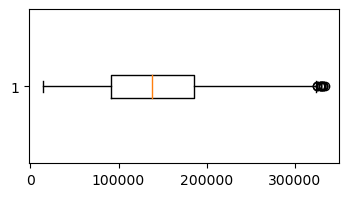

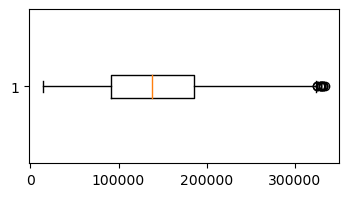

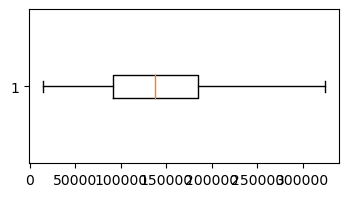

In [66]:

import matplotlib.pyplot as plt
index, val = detect_outliers(df["Salary"])
df.drop(index, axis=0, inplace=True)

plt.figure(figsize=((4, 2)))
plt.boxplot(df["Salary"], vert=False)
plt.show()


index, val = detect_outliers(df["Salary"])

plt.figure(figsize=((4, 2)))
plt.boxplot(df["Salary"], vert=False)
plt.show()


index, val = detect_outliers(df["Salary"])
df.drop(index, axis=0, inplace=True)
plt.figure(figsize=((4, 2)))
plt.boxplot(df["Salary"], vert=False)
plt.show()

In [67]:
from sklearn.model_selection import train_test_split

# splitting data
X = df.drop(["Salary in USD","Salary"], 1)
y = df[["Salary in USD"]]

In [68]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEnc = LabelEncoder()
X["Year"] = labelEnc.fit_transform(X["Year"])
X

,Year,Job Title_AI Scientist,Job Title_Analytics Engineer,Job Title_Applied Data Scientist,Job Title_Applied Machine Learning Scientist,Job Title_Applied Scientist,Job Title_BI Analyst,Job Title_BI Data Analyst,Job Title_BI Developer,Job Title_Big Data Engineer,...,Employee Residence_Turkey,Employee Residence_Ukraine,Employee Residence_United Arab Emirates,Employee Residence_United Kingdom,Employee Residence_United States,Employee Residence_Uzbekistan,Employee Residence_Viet Nam,Company Size_Large,Company Size_Medium,Company Size_Small
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3293,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3294,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3296,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=False)


In [70]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Hyperparameter Optimization

#### Defining hyperparameter space

In [71]:
hyperparameters = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.5, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'alpha': [0.9, 0.95, 0.99]
}


#### Random search

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# perform random search
clf_rs = RandomizedSearchCV(GradientBoostingRegressor(), hyperparameters, cv = 5, n_iter = 20)
random_search = clf_rs.fit(X_train, y_train)

# identify best parameters from random search
random_search.best_params_

{'subsample': 1.0,
 'n_estimators': 200,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'min_impurity_decrease': 0.2,
 'max_depth': 3,
 'learning_rate': 0.1,
 'alpha': 0.95}

In [73]:
model_arbre = GradientBoostingRegressor(
                                     max_depth=random_search.best_params_["max_depth"],
                                     min_samples_leaf=random_search.best_params_["min_samples_leaf"],
                                     min_samples_split=random_search.best_params_["min_samples_split"],
                                     min_weight_fraction_leaf=random_search.best_params_["min_impurity_decrease"],
                                     n_estimators=random_search.best_params_["n_estimators"],
                                     alpha=random_search.best_params_["alpha"],
                                     learning_rate=random_search.best_params_["learning_rate"],
                                     subsample=random_search.best_params_["subsample"],
                                     min_impurity_decrease=random_search.best_params_["min_impurity_decrease"]

                                     )
model_arbre.fit(X_train,y_train)
model_arbre.score(X_test,y_test)

0.31275845904819466

#### Grid search

In [74]:
# from sklearn.model_selection import GridSearchCV

# # perform grid search
# clf_gs = GridSearchCV(GradientBoostingRegressor(), hyperparameters, cv = 3)
# grid_search = clf_gs.fit(X_train, y_train)

# # identify best parameters from grid search
# grid_search.best_params_

In [75]:
# model_arbre1 = GradientBoostingRegressor(
#                                      max_depth=grid_search.best_params_["max_depth"],
#                                      min_samples_leaf=grid_search.best_params_["min_samples_leaf"],
#                                      min_samples_split=grid_search.best_params_["min_samples_split"],
#                                      min_weight_fraction_leaf=0.0,
#                                     #  n_estimators=grid_search.best_params_["n_estimators"],
#                                     #  bootstrap=grid_search.best_params_["bootstrap"],
#                                     #  max_features=grid_search.best_params_["max_features"]

                                     
#                                      )
# model_arbre1.fit(X_train,y_train)
# model_arbre1.score(X_test,y_test)

#### Bayesian Optimization

In [76]:
from skopt import BayesSearchCV

# perform bayesian optimization
clf_bo = BayesSearchCV(GradientBoostingRegressor(), hyperparameters, cv =5,  n_iter = 20)
bayes_search = clf_bo.fit(X_train, y_train)

# identify best parameters from bayesian optimization
bayes_search.best_params_

OrderedDict([('alpha', 0.95),
             ('learning_rate', 0.1),
             ('max_depth', 5),
             ('min_impurity_decrease', 0.0),
             ('min_samples_leaf', 2),
             ('min_samples_split', 5),
             ('min_weight_fraction_leaf', 0.0),
             ('n_estimators', 100),
             ('subsample', 1.0)])

In [77]:
model_arbre2 =GradientBoostingRegressor(
                                     max_depth=bayes_search.best_params_["max_depth"],
                                     min_samples_leaf=bayes_search.best_params_["min_samples_leaf"],
                                     min_samples_split=bayes_search.best_params_["min_samples_split"],
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=bayes_search.best_params_["n_estimators"],
                                     alpha=bayes_search.best_params_["alpha"],
                                     learning_rate=bayes_search.best_params_["learning_rate"],
                                     subsample=bayes_search.best_params_["subsample"],
                                     min_impurity_decrease=bayes_search.best_params_["min_impurity_decrease"]

                                     
                                     )
model_arbre2.fit(X_train,y_train)
model_arbre2.score(X_test,y_test)

0.446944467592736

## Les reseaux de neurones

In [78]:
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [79]:
rn_model = build_and_compile_model()

In [80]:
rn_model.fit(X_train,y_train,epochs=500,batch_size=32)

Epoch 1/500


80/80 [==============================] - 1s 3ms/step - loss: 147581.4219
Epoch 2/500
80/80 [==============================] - 0s 3ms/step - loss: 147388.0156
Epoch 3/500
80/80 [==============================] - 0s 3ms/step - loss: 146491.6406
Epoch 4/500
80/80 [==============================] - 0s 3ms/step - loss: 144226.2500
Epoch 5/500
80/80 [==============================] - 0s 3ms/step - loss: 139978.2656
Epoch 6/500
80/80 [==============================] - 0s 3ms/step - loss: 133209.1406
Epoch 7/500
80/80 [==============================] - 0s 3ms/step - loss: 123455.3281
Epoch 8/500
80/80 [==============================] - 0s 3ms/step - loss: 110435.3125
Epoch 9/500
80/80 [==============================] - 0s 3ms/step - loss: 94642.8828
Epoch 10/500
80/80 [==============================] - 0s 3ms/step - loss: 78346.2344
Epoch 11/500
80/80 [==============================] - 0s 5ms/step - loss: 64177.1836
Epoch 12/500
80/80 [==============================] - 0s 3ms/step - loss: 5434

In [81]:
from sklearn.metrics import r2_score
y_pred = rn_model.predict(X_test)
r2_score(y_test,y_pred)

20/20 [==============================] - 0s 2ms/step


0.5086007742190143

In [82]:
# rn_model.save('model_rn1')

In [83]:
def build_and_compile_model1():
    # Couche d'entrée
    inputs = keras.Input(shape=(X_train.shape[1],))
    
    # Ajoutez les couches cachées avec les activations ReLU
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    
    # Couche de sortie
    outputs = layers.Dense(1)(x)
    
    # Créez le modèle en spécifiant les entrées et les sorties
    model = keras.Model(inputs=inputs, outputs=outputs)
    
    # Compilez le modèle avec les paramètres appropriés
    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    
    return model


In [84]:
model_rn1 = build_and_compile_model1()

In [85]:
X_train.shape

(2558, 153)

In [86]:
model_rn1.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
80/80 [==============================] - 1s 4ms/step - loss: 147400.5000
Epoch 2/100
80/80 [==============================] - 0s 4ms/step - loss: 123662.3516
Epoch 3/100
80/80 [==============================] - 0s 4ms/step - loss: 48268.2070
Epoch 4/100
80/80 [==============================] - 0s 4ms/step - loss: 43984.3359
Epoch 5/100
80/80 [==============================] - 0s 3ms/step - loss: 42266.8164
Epoch 6/100
80/80 [==============================] - 0s 3ms/step - loss: 41265.1797
Epoch 7/100
80/80 [==============================] - 0s 4ms/step - loss: 40531.6875
Epoch 8/100
80/80 [==============================] - 0s 3ms/step - loss: 40049.2109
Epoch 9/100
80/80 [==============================] - 0s 4ms/step - loss: 39662.6602
Epoch 10/100
80/80 [==============================] - 0s 4ms/step - loss: 39445.8398
Epoch 11/100
80/80 [==============================] - 0s 4ms/step - loss: 39201.0391
Epoch 12/100
80/80 [==============================] - 0s 3ms/step - loss

In [87]:
from sklearn.metrics import r2_score
y_pred1 = model_rn1.predict(X_test)
r2_score(y_test,y_pred1)

20/20 [==============================] - 0s 2ms/step


0.49537809968176527

In [88]:
model_rn1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 153)]             0         
                                                                 
 dense_19 (Dense)            (None, 64)                9856      
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable